## Regressão Linear

**Regressão Linear**

*Autor: Danillo de Souza*

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
df = pd.read_csv('dataframes/auto-mpg.csv', sep=',')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [6]:
df[df['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


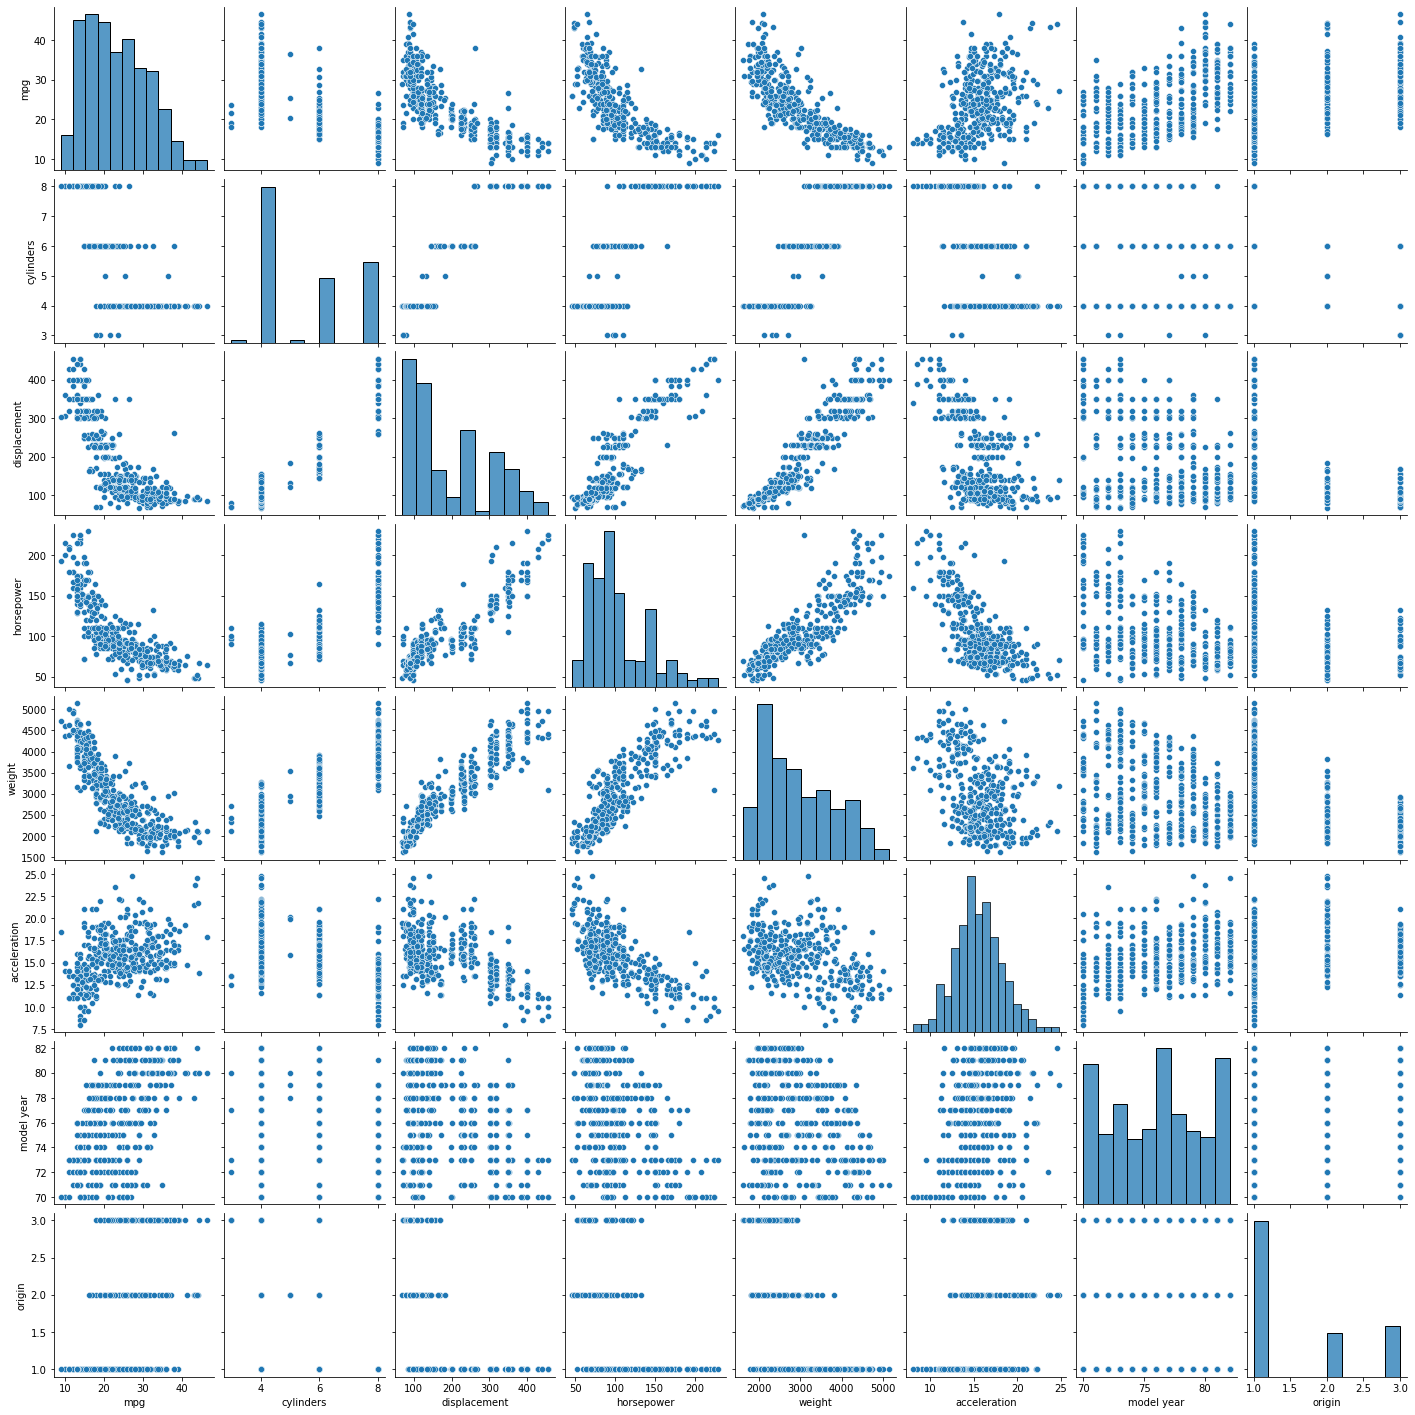

In [9]:
sns.pairplot(df)

<AxesSubplot:>

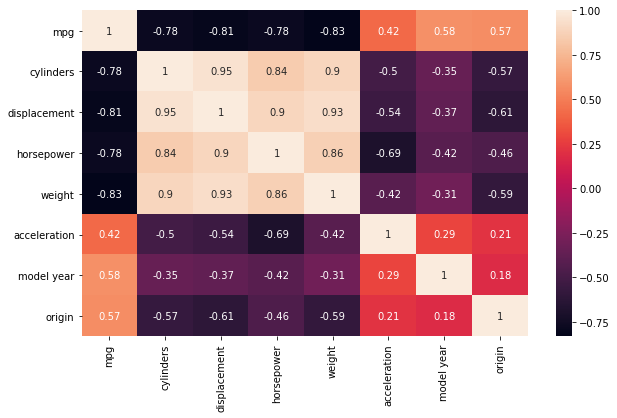

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

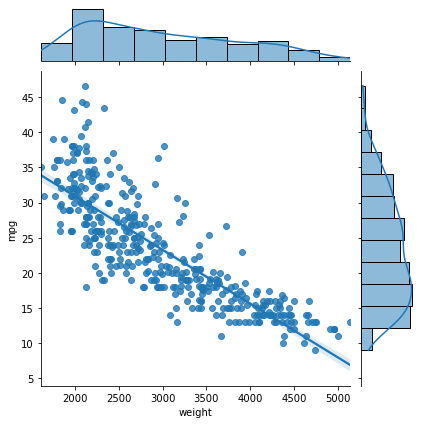

In [11]:
sns.jointplot(x='weight',y='mpg',data=df,kind='reg')

<AxesSubplot:xlabel='cylinders', ylabel='displacement'>

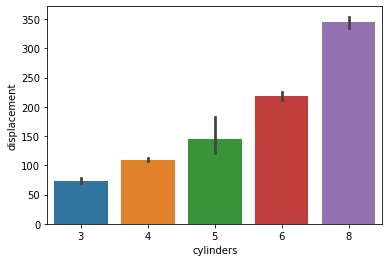

In [12]:
sns.barplot(y='displacement',x='cylinders',data=df)

<AxesSubplot:>

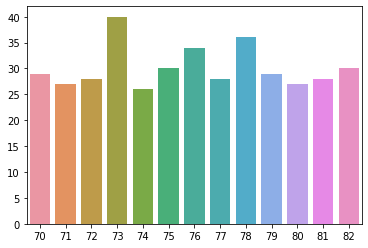

In [13]:
sns.barplot(x=df['model year'].value_counts().index,y=df['model year'].value_counts().values,data=df)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

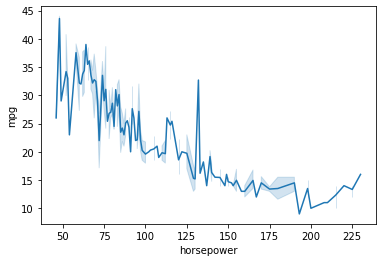

In [14]:
sns.lineplot(y='mpg', x='horsepower', data=df)

In [15]:
X = df.drop(['mpg', 'car name'],axis=1)
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,2
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


In [16]:
Y = df['mpg']
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

**Dividindo os dados em treino(80%) e teste(20%)**

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=100)

In [18]:
X_train.shape

(313, 7)

In [19]:
X_test.shape

(79, 7)

**Escalonamento das Características**

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=["cylinders","displacement","horsepower","weight","acceleration","model year","origin"])
X_test = sc.transform (X_test)
X_test = pd.DataFrame(X_test,columns=["cylinders","displacement","horsepower","weight","acceleration","model year","origin"])
X_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,0.335345,0.058062,-0.245602,0.174005,0.345897,-0.542710,-0.727181
1,-0.830910,-1.082268,-0.969359,-1.175528,-0.016317,-0.542710,0.489972
2,-0.830910,-0.986442,-0.865965,-1.143537,-0.233645,0.525643,0.489972
3,0.335345,0.077227,-0.504086,0.011682,0.092347,0.525643,-0.727181
4,-0.830910,-0.440233,-0.969359,0.349361,2.265629,1.059820,0.489972
...,...,...,...,...,...,...,...
74,-0.830910,-0.909781,-0.762571,-0.817706,0.961660,0.258555,1.707125
75,0.335345,-0.229416,0.400610,1.024720,0.418339,-0.008533,0.489972
76,1.501600,1.073818,0.400610,1.192967,-0.595859,-0.008533,-0.727181
77,1.501600,1.207974,2.726972,1.690600,-0.740744,-1.611062,-0.727181


**Definindo o melhor hiperparâmetro**

In [21]:
params = [
    {
        'fit_intercept':[True,False],
        'normalize':[True,False],
        'copy_X':[True,False],
        'n_jobs':[1,10,20,30,40],
        'positive':[True,False],
    }
]
modelo_regressao = LinearRegression(normalize=True)
grid_search = GridSearchCV(modelo_regressao, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train,Y_train)
grid_search.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': 1,
 'normalize': True,
 'positive': False}

**Ajustando o modelo e predizendo**

In [22]:
modelo_regressao.fit(X_train,Y_train)
pred = modelo_regressao.predict(X_test) 
pred[:10]

array([20.61948541, 28.32480867, 31.2321233 , 24.75470991, 26.62846117,
       12.10940297, 34.5931021 , 18.1579619 , 28.33043486, 21.4979966 ])

In [23]:
Y_test[:10]

125    20.0
142    26.0
278    31.5
254    20.2
328    30.0
138    14.0
375    36.0
134    16.0
393    27.0
176    19.0
Name: mpg, dtype: float64

**Testes de desempenho do modelo**

In [24]:
modelo_regressao.score(X_test,Y_test)

0.8037809643876379

In [25]:
print("RMSE",np.sqrt(mean_squared_error(Y_test,pred)))

RMSE 3.1032428995268067


In [26]:
cross = cross_val_score(modelo_regressao,X_test,Y_test,cv=10)
final = sum(cross) / len(cross)
final

0.737766595382735

**Testando se o modelo está generalizando bem**

In [27]:
# fonte: https://www.edmunds.com/volkswagen/cabriolet/1990/features-specs/
# 25 MPG

X_real = pd.DataFrame([
    ["4","303","94",df["weight"].mean(),df["acceleration"].mean(),"1990",1]
],columns=X.columns.to_list())
X_real=sc.fit_transform(X_real)
pred = modelo_regressao.predict(X_real)
pred

array([23.74952077])